# Train a online portfolio

In [1]:
import jax.numpy as jnp
import jax
import optax

from pyfoliopt.loss import neg_log_dot

In [2]:
key = jax.random.PRNGKey(42)
T = 1000
N = 2


historical_prices = jnp.exp(jax.random.normal(key, (T, N)) * 1e-2)
historical_prices

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Array([[1.008022  , 0.9887478 ],
       [0.99499846, 1.0025518 ],
       [1.0064498 , 0.9924936 ],
       ...,
       [0.99779594, 0.97981924],
       [0.97895217, 1.0074118 ],
       [1.0175679 , 1.0235744 ]], dtype=float32)

In [3]:
start_learning_rate = 1
params = jnp.ones(N) / N

In [4]:
from pyfoliopt.optimizer import egd

In [5]:
# Create the mirror descent optimizer
optimizer = egd(start_learning_rate)
opt_state = optimizer.init(params)

# Optimization loop (simplified)
values = []
for i in range(T):
    values.append(
        jnp.dot(historical_prices[i], params)
    )
    
    grads = jax.grad(neg_log_dot, argnums=1)(historical_prices[i], params)
    updates, opt_state = optimizer.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)
    params = params / jnp.sum(params) # Avoid numerical instability

    print("Optimized params:", params)
    print("Sum of weights: ", jnp.sum(params, axis=-1))

Optimized params: [0.5048262 0.4951738]
Sum of weights:  1.0
Optimized params: [0.5029356 0.4970644]
Sum of weights:  1.0
Optimized params: [0.506426 0.493574]
Sum of weights:  1.0
Optimized params: [0.5061489 0.4938511]
Sum of weights:  1.0
Optimized params: [0.50152344 0.4984766 ]
Sum of weights:  1.0
Optimized params: [0.5065766 0.4934234]
Sum of weights:  1.0
Optimized params: [0.50529623 0.49470377]
Sum of weights:  1.0
Optimized params: [0.5083363 0.4916637]
Sum of weights:  1.0
Optimized params: [0.5046173  0.49538273]
Sum of weights:  1.0
Optimized params: [0.50669885 0.49330112]
Sum of weights:  1.0
Optimized params: [0.5089894 0.4910106]
Sum of weights:  1.0
Optimized params: [0.5071454  0.49285462]
Sum of weights:  1.0
Optimized params: [0.50899684 0.49100316]
Sum of weights:  1.0
Optimized params: [0.5045612  0.49543878]
Sum of weights:  1.0
Optimized params: [0.5078228  0.49217716]
Sum of weights:  1.0
Optimized params: [0.51031655 0.48968345]
Sum of weights:  1.0
Optimize

In [6]:
values = jnp.array(values).reshape(-1, 1)
values

Array([[0.99838483],
       [0.99873865],
       [0.9995127 ],
       [0.9978846 ],
       [0.9997679 ],
       [1.0012181 ],
       [0.9887324 ],
       [1.006385  ],
       [1.0050883 ],
       [0.99509585],
       [1.0064894 ],
       [0.98695767],
       [0.999153  ],
       [1.008094  ],
       [1.0042888 ],
       [1.0068442 ],
       [1.0031214 ],
       [0.99118435],
       [0.9998677 ],
       [0.9993821 ],
       [1.0036259 ],
       [0.99314785],
       [1.0030222 ],
       [0.9895739 ],
       [0.99145937],
       [1.0002526 ],
       [1.0039896 ],
       [0.99550426],
       [1.0012571 ],
       [1.0020379 ],
       [1.0027591 ],
       [0.9928538 ],
       [0.99345005],
       [1.003437  ],
       [0.9986962 ],
       [1.0050771 ],
       [1.0094143 ],
       [0.9972137 ],
       [1.0019268 ],
       [1.0197256 ],
       [1.0131913 ],
       [1.0087988 ],
       [1.0035381 ],
       [1.0007604 ],
       [0.998411  ],
       [0.9978616 ],
       [0.9955561 ],
       [1.005

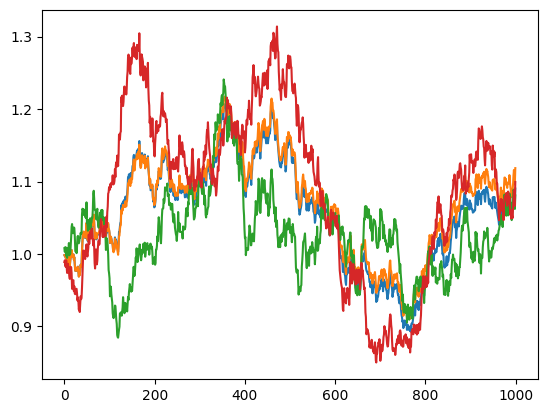

In [7]:
import matplotlib.pyplot as plt

returns = jnp.concat([values, historical_prices.mean(axis=-1, keepdims=True),  historical_prices], axis=-1)
plt.plot(returns.cumprod(axis=0))

In [8]:
(returns - 1).mean(axis=0) / (returns - 1).std(axis=0) * jnp.sqrt(252)

Array([0.25371078, 0.3132645 , 0.20312676, 0.22991318], dtype=float32)